Install and import necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [25]:
from sklearn.metrics import mean_absolute_error,  mean_absolute_percentage_error, r2_score

Data Cleaning

In [35]:
def load_monthly_data(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, sep=';', header=None, 
                     names=['Year', 'Month', 'Fractional_Year', 'Sunspots', 'Std_Dev', 'Obs', 'Definitive'])
    
    # Create a datetime index
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
    
    # Set 'Date' as the index
    df.set_index('Date', inplace=True)
    
    # Convert 'Sunspots' to numeric, replacing any non-numeric values with NaN
    df['Sunspots'] = pd.to_numeric(df['Sunspots'], errors='coerce')
    
    # Remove any rows with NaN sunspot values
    df_cleaned = df[['Sunspots']].dropna()
    
    # Remove any rows with negative sunspot values
    df_cleaned = df_cleaned[df_cleaned['Sunspots'] >= 0]
    
    print("Columns:", df_cleaned.columns)
    print("Data cleaned:")
    print(df_cleaned.head())
    print("\nSummary:")
    print(df_cleaned.describe())
    
    return df_cleaned

file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv'
monthly_data = load_monthly_data(file_path)

Columns: Index(['Sunspots'], dtype='object')
Data cleaned:
            Sunspots
Date                
1749-01-01      96.7
1749-02-01     104.3
1749-03-01     116.7
1749-04-01      92.8
1749-05-01     141.7

Summary:
          Sunspots
count  3280.000000
mean     81.594329
std      67.805438
min       0.000000
25%      23.900000
50%      66.850000
75%     122.400000
max     398.200000


Time unit detection 

In [42]:
def determine_time_unit(data):
    if isinstance(data, pd.DataFrame) and 'Date' in data.columns:
        date_column = data['Date']
    elif isinstance(data, pd.Series):
        date_column = data
    else:
        raise ValueError("Input must be a pandas DataFrame with a 'Date' column or a Series")

    # Ensure date_column is in datetime format
    date_column = pd.to_datetime(date_column, errors='coerce')

    # Calculate time differences
    time_diff = date_column.diff().dropna()
    
    # Check if the time difference is consistently close to 30 days (monthly)
    if np.allclose(time_diff.dt.days, 30, atol=5):
        return 'monthly'
    else:
        return 'irregular'

# Read the CSV file
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv'
data = pd.read_csv(file_path, sep=';', header=None, 
                   names=['Year', 'Month', 'Fractional_Year', 'Sunspots', 'Std_Dev', 'Obs', 'Definitive'])

# Convert Year and Month to a proper Date column
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01', format='%Y-%m-%d')

time_unit = determine_time_unit(data)
print(f"The time series is {time_unit}")

# No need to convert to daily dataset as it's already daily
daily_data = data

daily_time_unit = determine_time_unit(daily_data)
print(f"The converted time series is {daily_time_unit}")

# Display the first few rows of the monthly dataset
print(data.head())


The time series is monthly
The converted time series is monthly
   Year  Month  Fractional_Year  Sunspots  Std_Dev  Obs  Definitive       Date
0  1749      1         1749.042      96.7     -1.0   -1           1 1749-01-01
1  1749      2         1749.123     104.3     -1.0   -1           1 1749-02-01
2  1749      3         1749.204     116.7     -1.0   -1           1 1749-03-01
3  1749      4         1749.288      92.8     -1.0   -1           1 1749-04-01
4  1749      5         1749.371     141.7     -1.0   -1           1 1749-05-01


 train your model into the future

C:\Users\harin\AppData\Local\Temp\ipykernel_8652\2901136909.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['y'].replace(-1, pd.NA, inplace=True)
11:25:29 - cmdstanpy - INFO - Chain [1] start processing
11:25:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Prediction for 1 month(s):
Date: 2022-04-30 00:00:00
Predicted Sunspots: 15.51
Confidence Interval: [-64.71, 92.37]


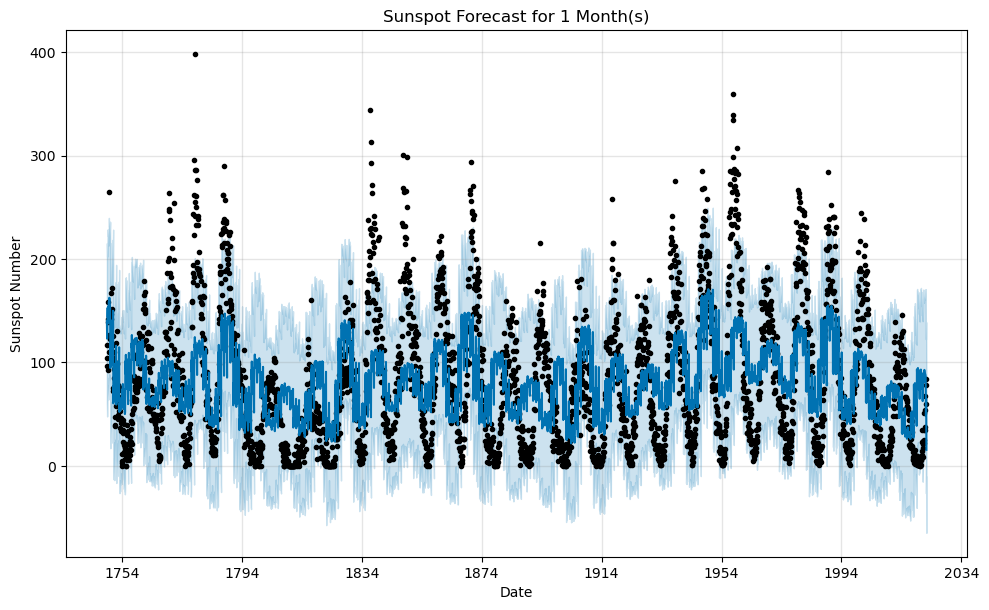

C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Prediction for 6 month(s):
Date: 2022-09-30 00:00:00
Predicted Sunspots: 33.40
Confidence Interval: [-42.85, 107.66]


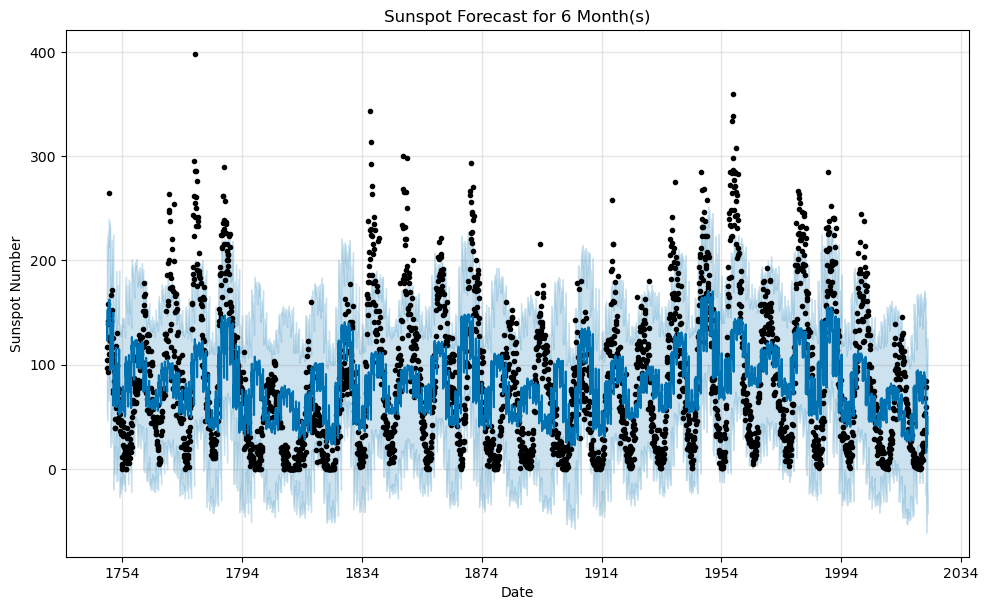

C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Prediction for 9 month(s):
Date: 2022-12-31 00:00:00
Predicted Sunspots: 46.86
Confidence Interval: [-30.68, 121.30]


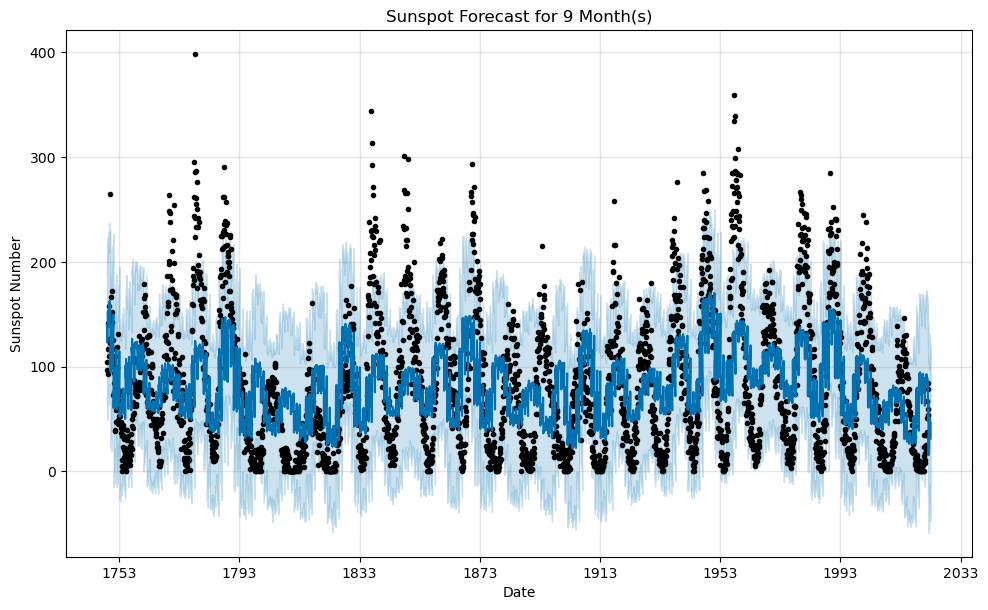

In [33]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv'  # Replace with your file path
data = pd.read_csv(file_path, delimiter=';', header=None)

# Assign column names based on the dataset description
data.columns = ['Year', 'Month', 'Date Fraction', 'Sunspot Number', 'Standard Deviation', 
                'Observation Count', 'Definitive Indicator']

# Create a date column
data['ds'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))  # Assume 1st of each month
data['y'] = data['Sunspot Number']

# Replace missing values (-1) with NaN and drop rows with NaN values
data['y'].replace(-1, pd.NA, inplace=True)
data.dropna(subset=['y'], inplace=True)

# Instantiate and configure Prophet model
model = Prophet(growth='linear', yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Train the model
model.fit(data[['ds', 'y']])

# Function to predict and visualize for a specific period
def forecast_sunspots(periods, freq='M'):
    # Create future dataframe
    future = model.make_future_dataframe(periods=periods, freq=freq)
    
    # Predict future values
    forecast = model.predict(future)
    
    # Extract specific prediction
    prediction = forecast.iloc[-1][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    # Print result
    print(f"\nPrediction for {periods} month(s):")
    print(f"Date: {prediction['ds']}")
    print(f"Predicted Sunspots: {prediction['yhat']:.2f}")
    print(f"Confidence Interval: [{prediction['yhat_lower']:.2f}, {prediction['yhat_upper']:.2f}]")
    
    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'Sunspot Forecast for {periods} Month(s)')
    plt.xlabel('Date')
    plt.ylabel('Sunspot Number')
    plt.show()

# Predict for 1, 6, and 9 months separately
forecast_sunspots(1)
forecast_sunspots(6)
forecast_sunspots(9)


Model tuning - Forecasting growth


16:23:45 - cmdstanpy - INFO - Chain [1] start processing
16:23:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


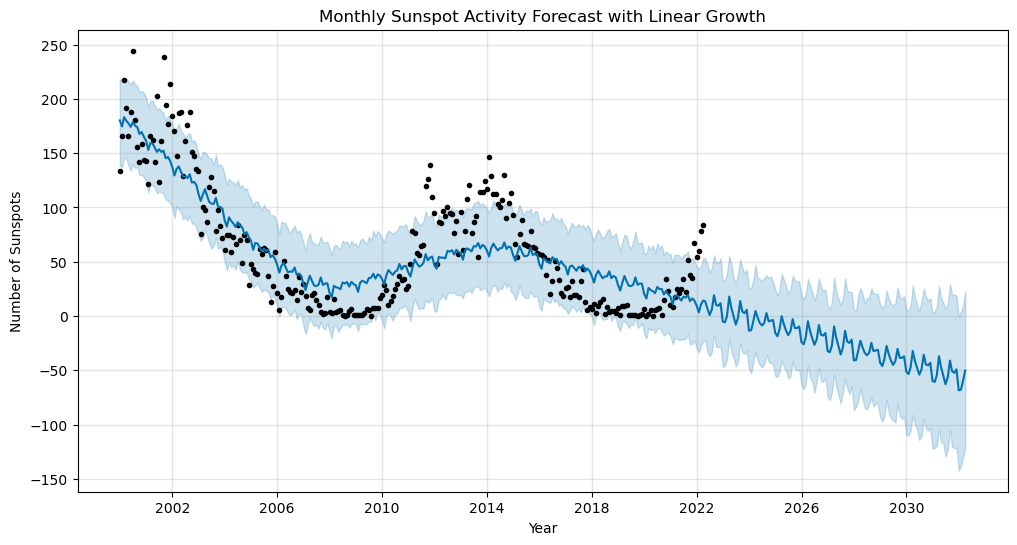

16:23:46 - cmdstanpy - INFO - Chain [1] start processing
16:23:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


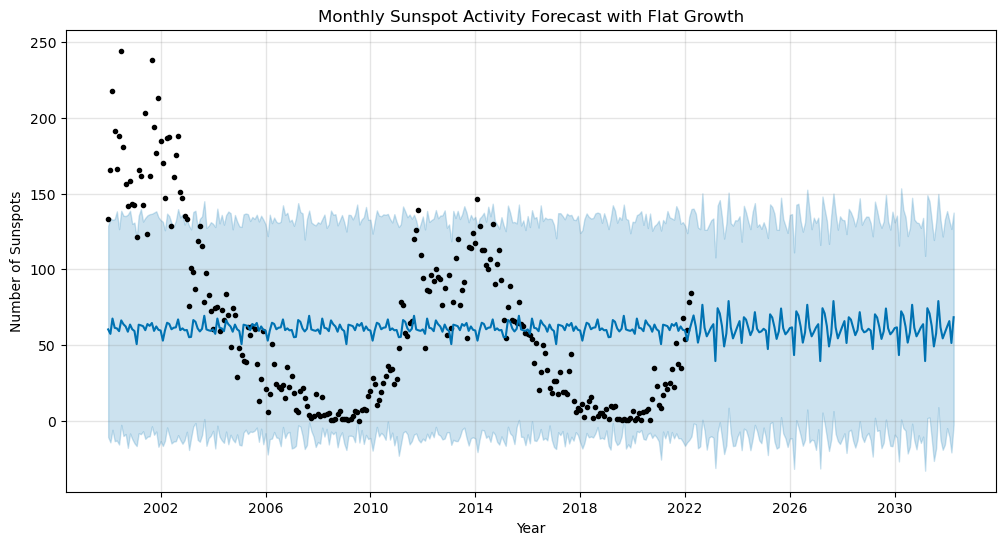

16:23:47 - cmdstanpy - INFO - Chain [1] start processing
16:23:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


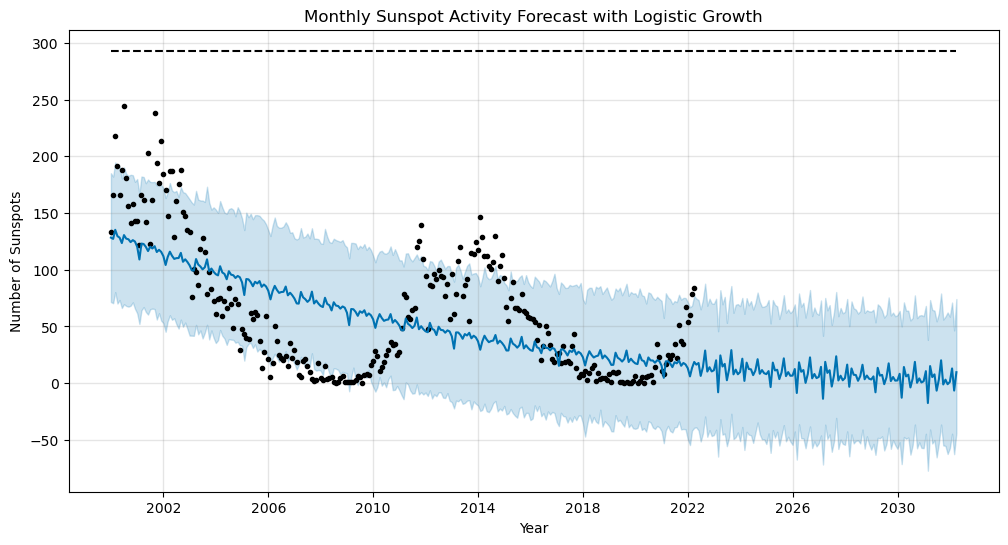

Linear Growth Forecast:
            ds       yhat
383 2031-11-30 -49.159576
384 2031-12-31 -68.404282
385 2032-01-31 -67.960608
386 2032-02-29 -59.704141
387 2032-03-31 -50.198205

Flat Growth Forecast:
            ds       yhat
383 2031-11-30  58.198625
384 2031-12-31  62.025417
385 2032-01-31  65.754475
386 2032-02-29  51.287048
387 2032-03-31  68.311243

Logistic Growth Forecast:
            ds       yhat
383 2031-11-30  -0.961394
384 2031-12-31   1.060932
385 2032-01-31  12.913907
386 2032-02-29  -6.586901
387 2032-03-31   9.614392


In [43]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the monthly dataset
monthly_dataset = pd.read_csv('C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv', header=None, names=['Year', 'Month', 'DecimalDate', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Create a datetime column from Year and Month
monthly_dataset['ds'] = pd.to_datetime(monthly_dataset['Year'].astype(str) + '-' + monthly_dataset['Month'].astype(str) + '-01', format='%Y-%m-%d')
monthly_dataset['y'] = monthly_dataset['Sunspots']

# Filter the dataset to include only data from the year 2000 onwards
df = monthly_dataset[monthly_dataset['ds'] >= '2000-01-01'][['ds', 'y']]

# Function to create and plot forecast
def create_forecast(growth_type, periods=120, cap=None):
    if growth_type == 'logistic':
        df['cap'] = cap
        m = Prophet(growth='logistic')
    else:
        m = Prophet(growth=growth_type)
    
    m.fit(df)
    
    future = m.make_future_dataframe(periods=periods, freq='M')
    if growth_type == 'logistic':
        future['cap'] = cap
    
    forecast = m.predict(future)
    
    fig = plt.figure(figsize=(12, 6))
    m.plot(forecast, ax=plt.gca())
    plt.title(f'Monthly Sunspot Activity Forecast with {growth_type.capitalize()} Growth')
    plt.xlabel('Year')
    plt.ylabel('Number of Sunspots')
    plt.show()
    
    return forecast

# Create forecasts for different growth types
linear_forecast = create_forecast('linear')
flat_forecast = create_forecast('flat')
logistic_forecast = create_forecast('logistic', cap=df['y'].max() * 1.2)

# Print the last 5 months of each forecast
print("Linear Growth Forecast:")
print(linear_forecast[['ds', 'yhat']].tail())
print("\nFlat Growth Forecast:")
print(flat_forecast[['ds', 'yhat']].tail())
print("\nLogistic Growth Forecast:")
print(logistic_forecast[['ds', 'yhat']].tail())


Seasonality

16:25:12 - cmdstanpy - INFO - Chain [1] start processing
16:25:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

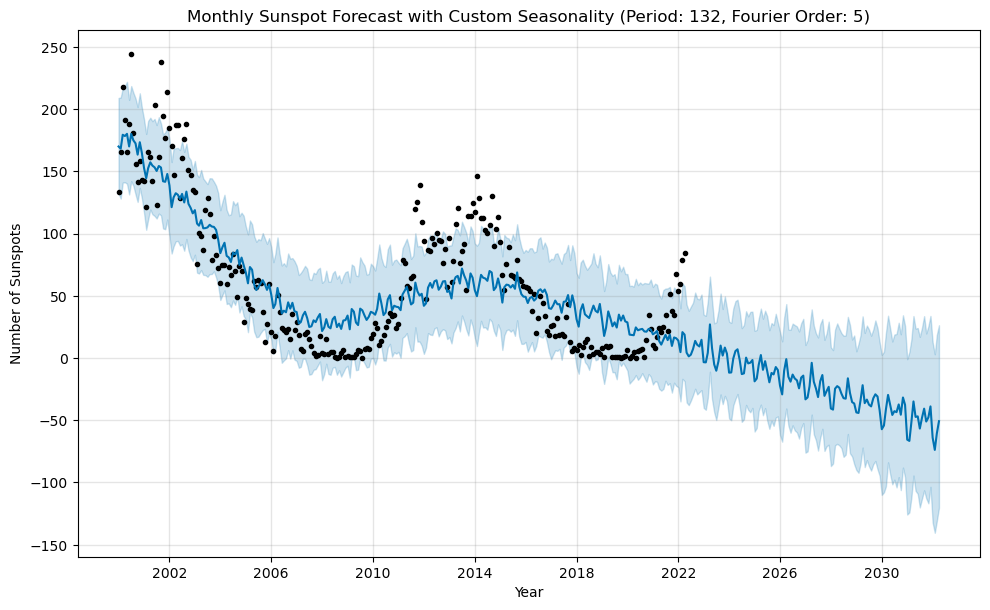

16:25:13 - cmdstanpy - INFO - Chain [1] start processing
16:25:13 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Period: 132 months, Fourier Order: 5
            ds       yhat
383 2031-11-30 -38.874409
384 2031-12-31 -63.976606
385 2032-01-31 -73.800599
386 2032-02-29 -60.647581
387 2032-03-31 -50.767188


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

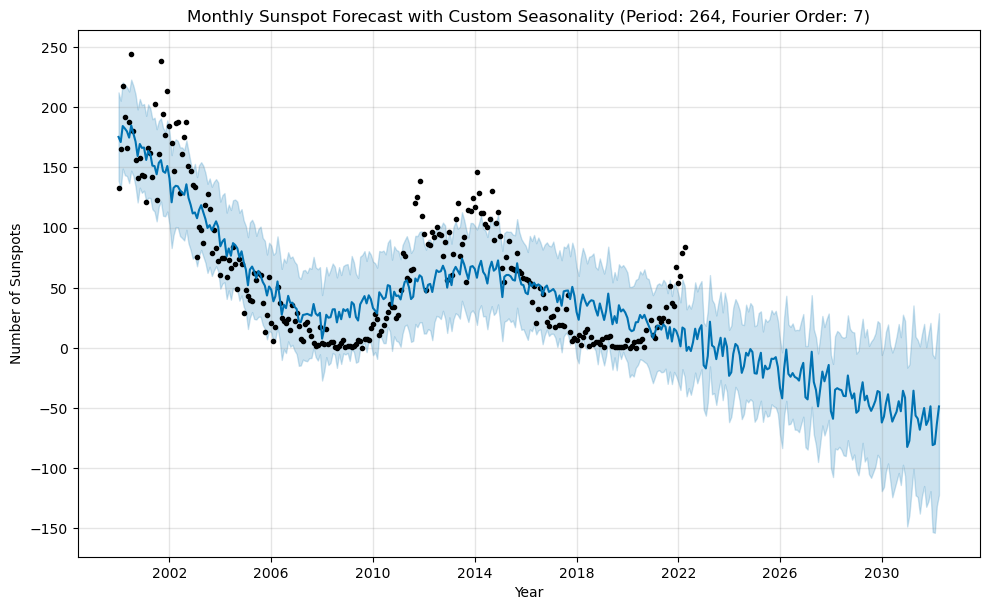

16:25:13 - cmdstanpy - INFO - Chain [1] start processing
16:25:13 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Period: 264 months, Fourier Order: 7
            ds       yhat
383 2031-11-30 -48.529369
384 2031-12-31 -80.767320
385 2032-01-31 -79.866941
386 2032-02-29 -63.328985
387 2032-03-31 -48.653077


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

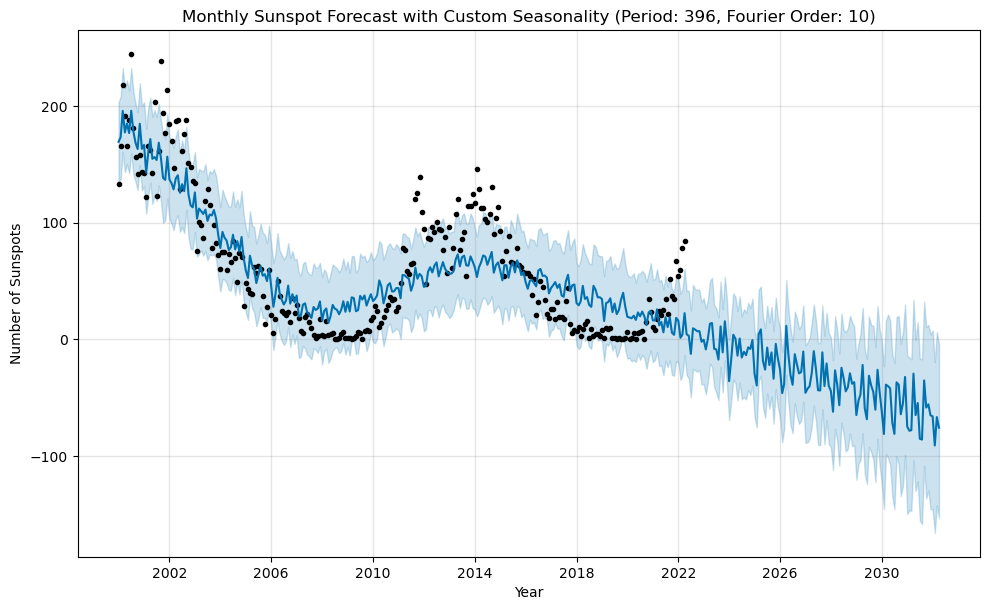

16:25:15 - cmdstanpy - INFO - Chain [1] start processing
16:25:15 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Period: 396 months, Fourier Order: 10
            ds       yhat
383 2031-11-30 -64.955529
384 2031-12-31 -65.872055
385 2032-01-31 -90.819900
386 2032-02-29 -66.491329
387 2032-03-31 -75.644125


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

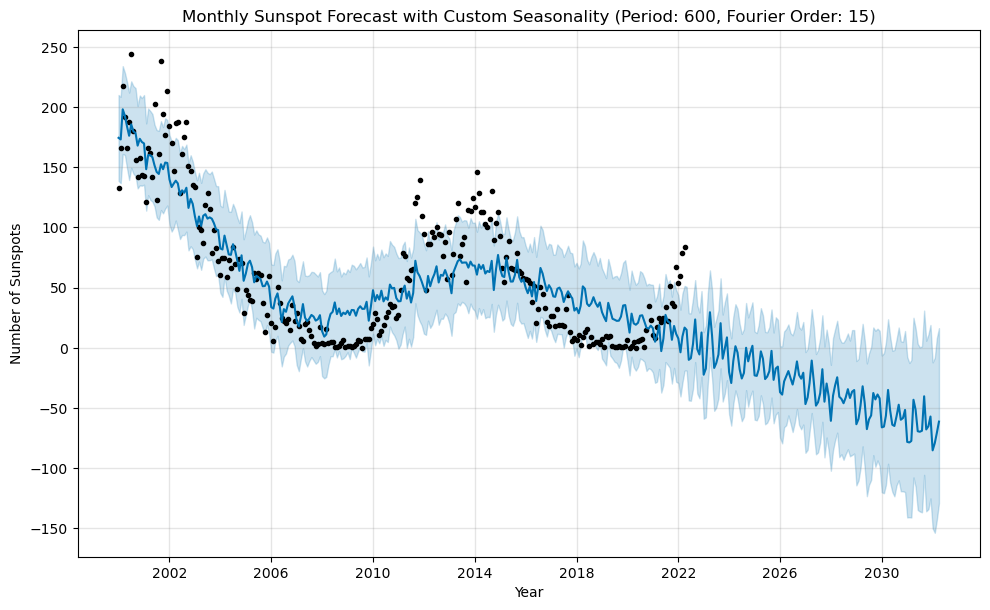

16:25:16 - cmdstanpy - INFO - Chain [1] start processing
16:25:16 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Period: 600 months, Fourier Order: 15
            ds       yhat
383 2031-11-30 -57.172191
384 2031-12-31 -85.299340
385 2032-01-31 -79.188409
386 2032-02-29 -70.890545
387 2032-03-31 -61.400090


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

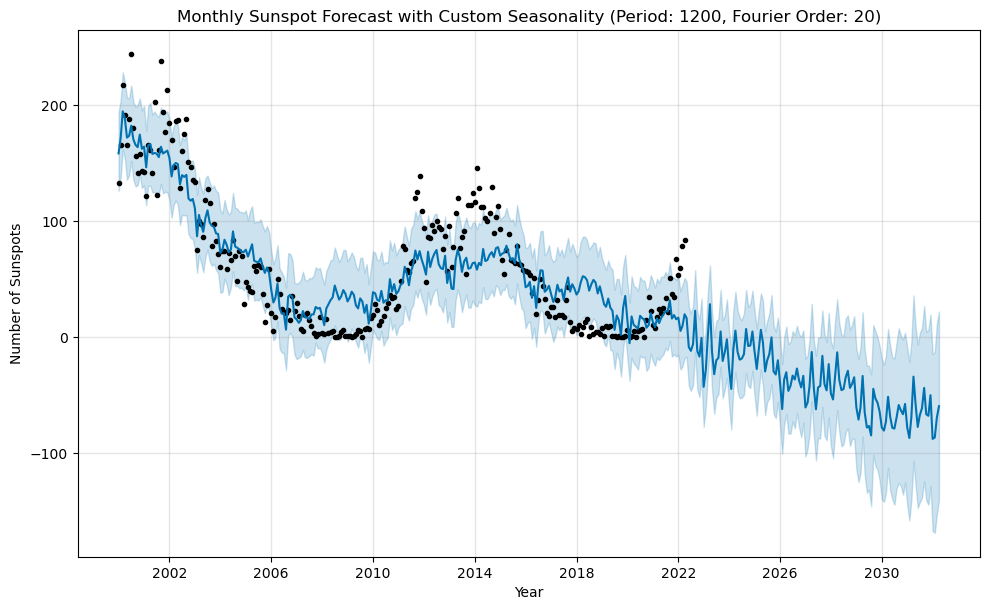


Forecast for Period: 1200 months, Fourier Order: 20
            ds       yhat
383 2031-11-30 -49.852761
384 2031-12-31 -87.540733
385 2032-01-31 -86.275005
386 2032-02-29 -69.373068
387 2032-03-31 -59.346890


In [44]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the monthly dataset
monthly_dataset = pd.read_csv('C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv', header=None, names=['Year', 'Month', 'DecimalDate', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Create a datetime column from Year and Month
monthly_dataset['ds'] = pd.to_datetime(monthly_dataset['Year'].astype(str) + '-' + monthly_dataset['Month'].astype(str) + '-01', format='%Y-%m-%d')
monthly_dataset['y'] = monthly_dataset['Sunspots']

# Filter the dataset to include only data from the year 2000 onwards
df = monthly_dataset[monthly_dataset['ds'] >= '2000-01-01'][['ds', 'y']]

# Function to create forecast with custom seasonality
def create_forecast_with_seasonality(period, fourier_order):
    m = Prophet()
    m.add_seasonality(name=f'custom_{period}', period=period, fourier_order=fourier_order)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=120, freq='M')
    forecast = m.predict(future)
    
    plt.figure(figsize=(12, 6))
    m.plot(forecast)
    plt.title(f'Monthly Sunspot Forecast with Custom Seasonality (Period: {period}, Fourier Order: {fourier_order})')
    plt.xlabel('Year')
    plt.ylabel('Number of Sunspots')
    plt.show()
    
    return forecast

# Test different combinations
period_fourier_combinations = [
    (132, 5),   # Approximately one solar cycle (11 years * 12 months)
    (264, 7),   # Approximately two solar cycles
    (396, 10),  # Approximately three solar cycles
    (600, 15),  # Longer-term cycle (50 years * 12 months)
    (1200, 20)  # Very long-term cycle (100 years * 12 months)
]

for period, fourier_order in period_fourier_combinations:
    forecast = create_forecast_with_seasonality(period, fourier_order)
    print(f"\nForecast for Period: {period} months, Fourier Order: {fourier_order}")
    print(forecast[['ds', 'yhat']].tail())


Trend changepoints

16:27:08 - cmdstanpy - INFO - Chain [1] start processing
16:27:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

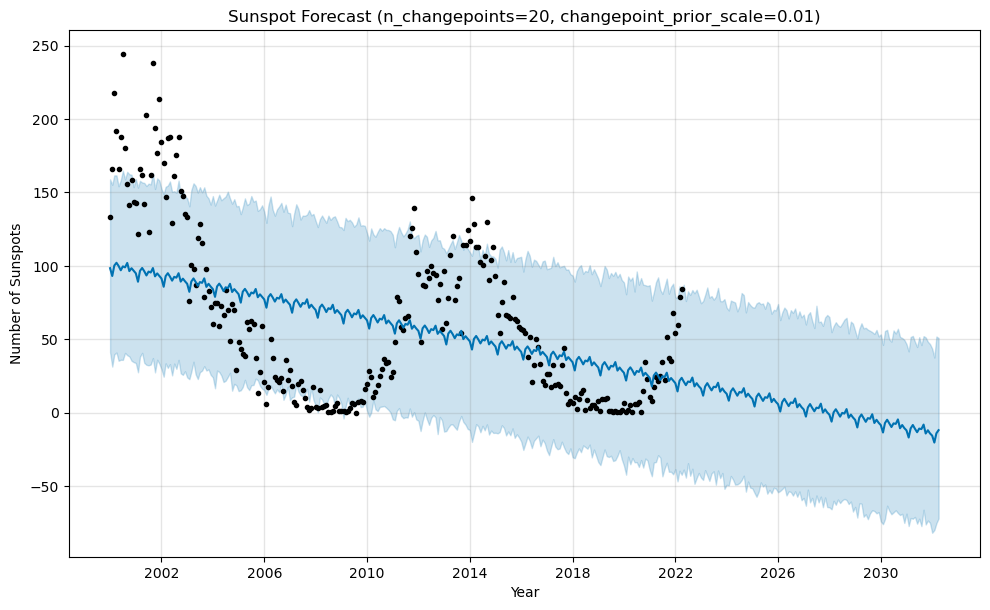

16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

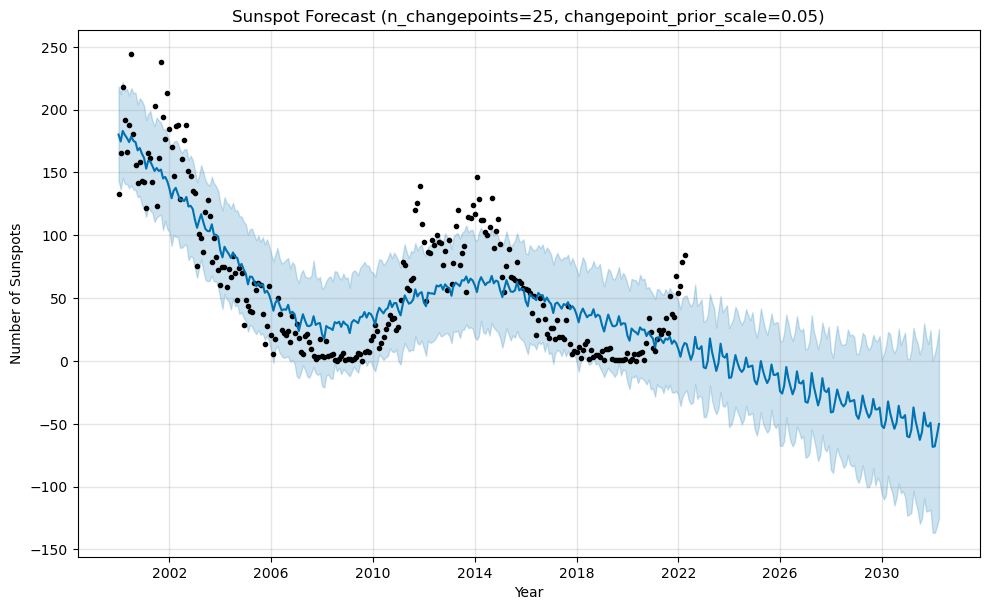

16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

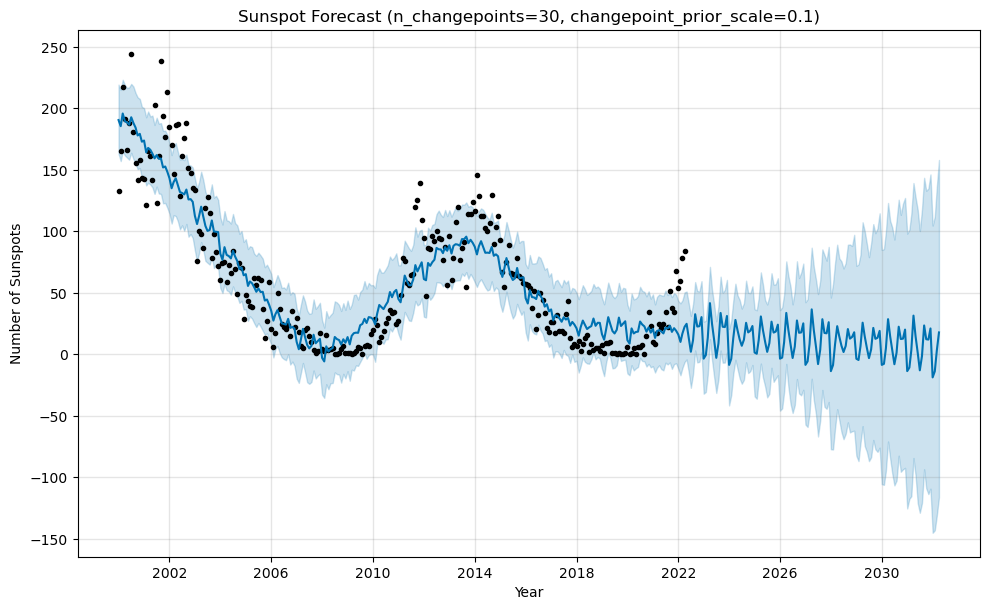

16:27:10 - cmdstanpy - INFO - Chain [1] start processing
16:27:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

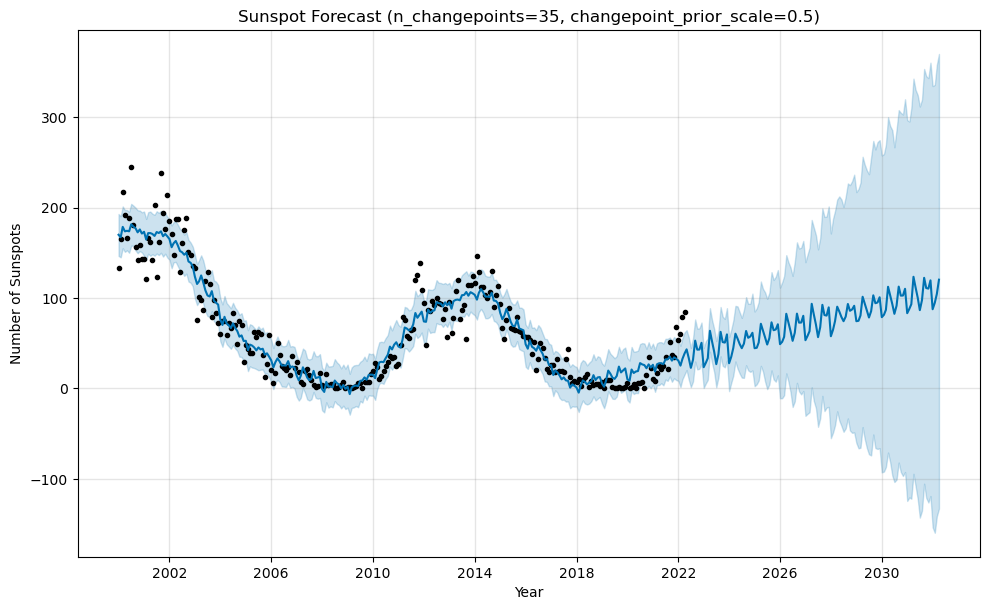

16:27:11 - cmdstanpy - INFO - Chain [1] start processing
16:27:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

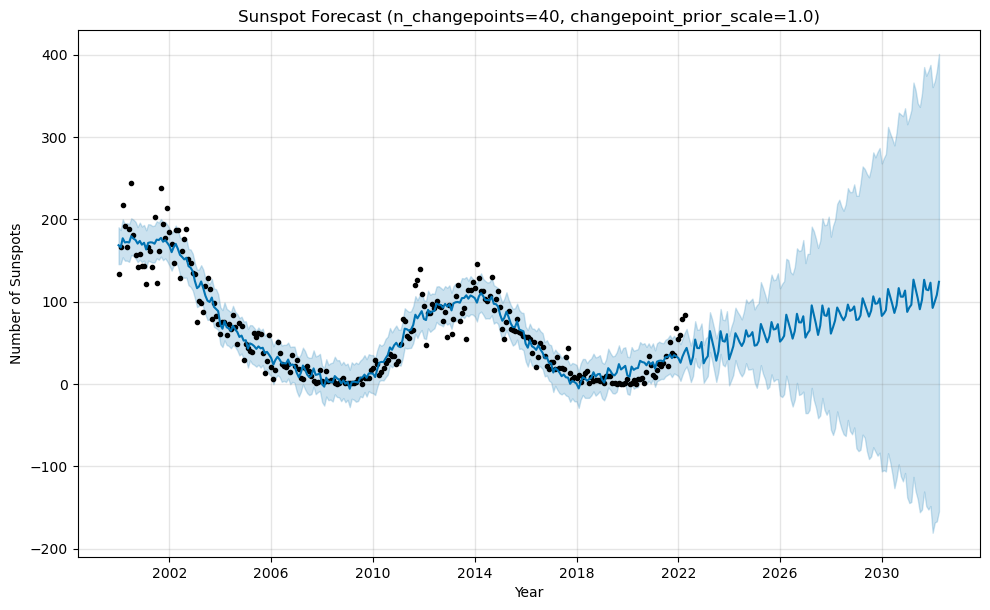


Forecast for n_changepoints=20, changepoint_prior_scale=0.01
            ds       yhat
383 2031-11-30 -14.201998
384 2031-12-31 -15.722034
385 2032-01-31 -20.440178
386 2032-02-29 -14.134913
387 2032-03-31 -12.003267

Forecast for n_changepoints=25, changepoint_prior_scale=0.05
            ds       yhat
383 2031-11-30 -49.159576
384 2031-12-31 -68.404282
385 2032-01-31 -67.960608
386 2032-02-29 -59.704141
387 2032-03-31 -50.198205

Forecast for n_changepoints=30, changepoint_prior_scale=0.1
            ds       yhat
383 2031-11-30  21.138999
384 2031-12-31 -18.657839
385 2032-01-31 -13.701641
386 2032-02-29   3.191825
387 2032-03-31  17.905130

Forecast for n_changepoints=35, changepoint_prior_scale=0.5
            ds        yhat
383 2031-11-30  119.474379
384 2031-12-31   87.568314
385 2032-01-31   94.750127
386 2032-02-29  104.367131
387 2032-03-31  120.249391

Forecast for n_changepoints=40, changepoint_prior_scale=1.0
            ds        yhat
383 2031-11-30  122.930500
384 2031-

In [45]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the monthly dataset
monthly_dataset = pd.read_csv('C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv', header=None, names=['Year', 'Month', 'DecimalDate', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Create a datetime column from Year and Month
monthly_dataset['ds'] = pd.to_datetime(monthly_dataset['Year'].astype(str) + '-' + monthly_dataset['Month'].astype(str) + '-01', format='%Y-%m-%d')
monthly_dataset['y'] = monthly_dataset['Sunspots']

# Filter the dataset to include only data from the year 2000 onwards
df = monthly_dataset[monthly_dataset['ds'] >= '2000-01-01'][['ds', 'y']]

# Function to create forecast with changepoints
def create_forecast_with_changepoints(n_changepoints, changepoint_prior_scale):
    m = Prophet(n_changepoints=n_changepoints, changepoint_prior_scale=changepoint_prior_scale)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=120, freq='M')  # Forecasting for 10 years ahead (monthly)
    forecast = m.predict(future)
    
    fig = plt.figure(figsize=(12, 6))
    m.plot(forecast)
    plt.title(f'Sunspot Forecast (n_changepoints={n_changepoints}, changepoint_prior_scale={changepoint_prior_scale})')
    plt.xlabel('Year')
    plt.ylabel('Number of Sunspots')
    plt.show()
    
    return forecast

# Test different combinations
changepoint_combinations = [
    (20, 0.01),
    (25, 0.05),
    (30, 0.1),
    (35, 0.5),
    (40, 1.0)
]

forecasts = []  # To store all forecasts

for n_changepoints, changepoint_prior_scale in changepoint_combinations:
    forecast = create_forecast_with_changepoints(n_changepoints, changepoint_prior_scale)
    forecasts.append((n_changepoints, changepoint_prior_scale, forecast[['ds', 'yhat']].tail()))

# Print the last 5 months of predictions for each configuration
for n_changepoints, changepoint_prior_scale, forecast in forecasts:
    print(f"\nForecast for n_changepoints={n_changepoints}, changepoint_prior_scale={changepoint_prior_scale}")
    print(forecast)


Evaluate all models by providing their respective MAE (Mean Absolute Error) and MAPE (Mean 
Absolute Percentage Error), as well as R2

16:29:11 - cmdstanpy - INFO - Chain [1] start processing
16:29:11 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 1: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


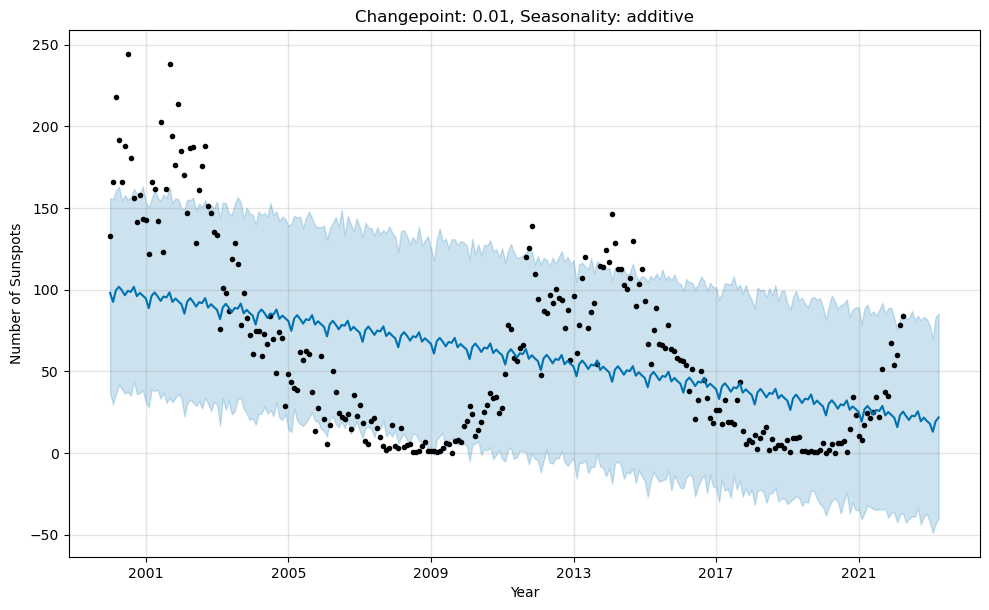

16:29:11 - cmdstanpy - INFO - Chain [1] start processing
16:29:11 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 2: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


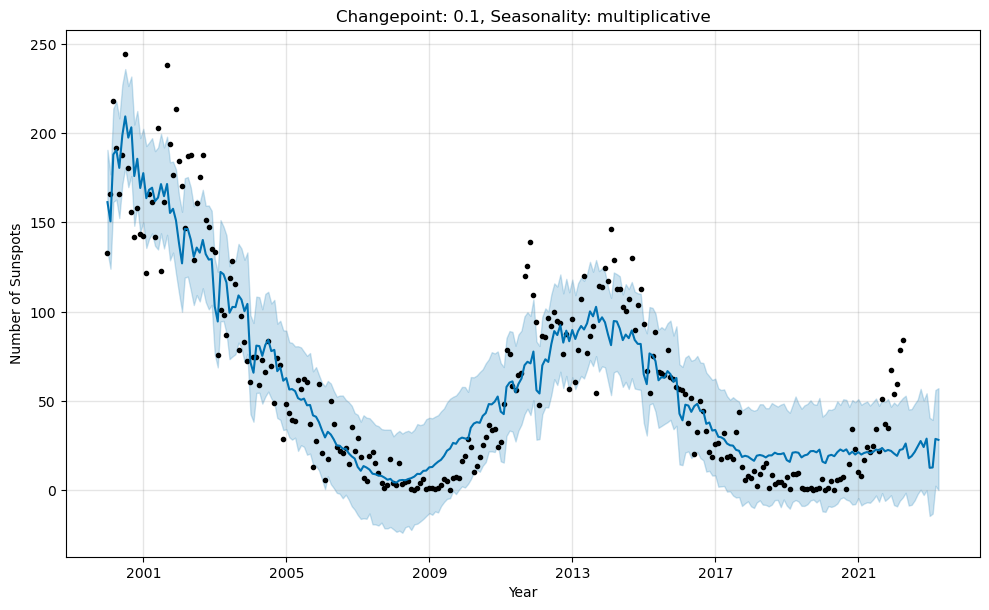

16:29:12 - cmdstanpy - INFO - Chain [1] start processing
16:29:12 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 3: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive'}


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


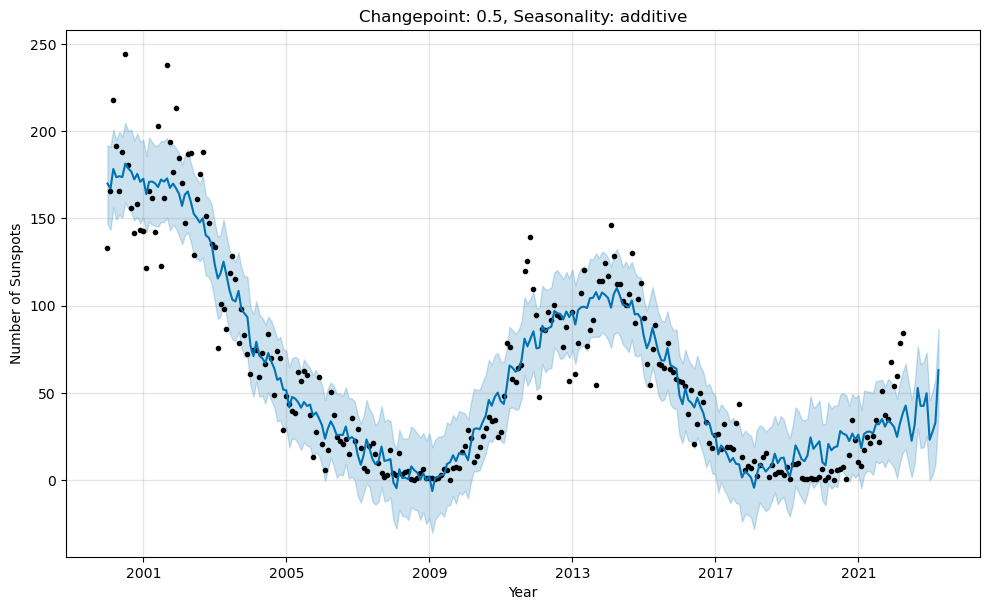

16:29:13 - cmdstanpy - INFO - Chain [1] start processing
16:29:13 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 4: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'}


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


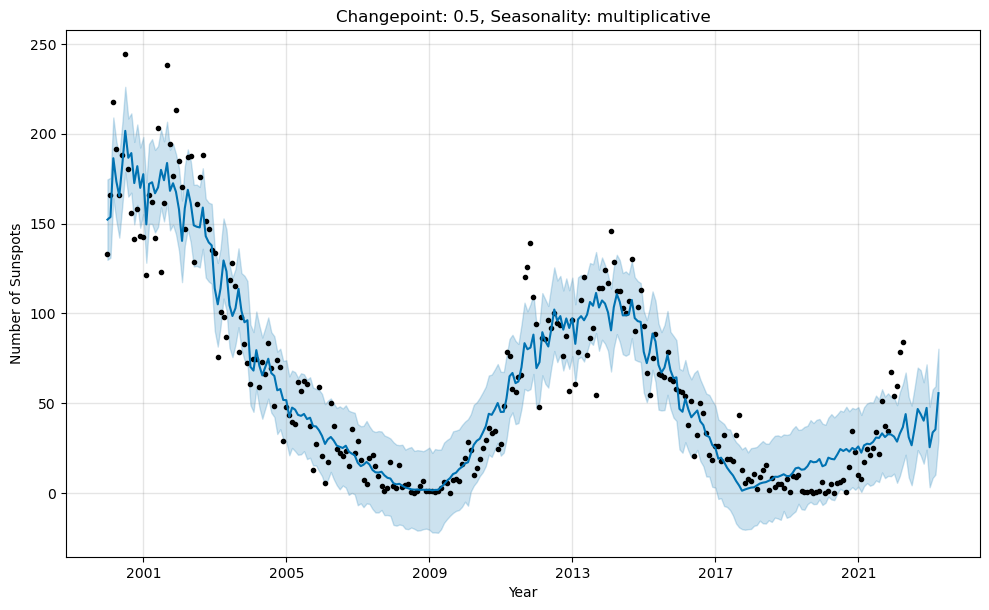


Test Case 1 Results:
MAE: 40.20
MAPE: 113232890333529744.00%
R²: 0.2777

Test Case 2 Results:
MAE: 16.57
MAPE: 39297487692215480.00%
R²: 0.8582

Test Case 3 Results:
MAE: 13.18
MAPE: 17189260002213450.00%
R²: 0.8999

Test Case 4 Results:
MAE: 12.94
MAPE: 14181588093136962.00%
R²: 0.9046


In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_m_tot_V2.0.csv'  # Replace with your dataset path
monthly_dataset = pd.read_csv(file_path, header=None, names=['Year', 'Month', 'DecimalDate', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Create a datetime column from Year and Month
monthly_dataset['ds'] = pd.to_datetime(monthly_dataset['Year'].astype(str) + '-' + monthly_dataset['Month'].astype(str) + '-01', format='%Y-%m-%d')
monthly_dataset['y'] = monthly_dataset['Sunspots']

# Filter the dataset to include only data from the year 2000 onwards
dataset = monthly_dataset[monthly_dataset['ds'] >= '2000-01-01'][['ds', 'y']]

# Define test cases with changepoint and seasonality settings
test_cases = [
    {"changepoint_prior_scale": 0.01, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.1, "seasonality_mode": "multiplicative"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "multiplicative"},
]

# Function to evaluate a Prophet model
def evaluate_prophet_model(params, dataset):
    # Initialize and fit the model with parameters
    model = Prophet(
        changepoint_prior_scale=params["changepoint_prior_scale"],
        seasonality_mode=params["seasonality_mode"]
    )
    model.fit(dataset)

    # Make future dataframe (12 months ahead for prediction)
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    # Split predictions into actuals and forecasts
    forecast_actuals = forecast[forecast['ds'] <= dataset['ds'].max()]
    forecast_future = forecast[forecast['ds'] > dataset['ds'].max()]

    # Calculate evaluation metrics on historical data
    y_true = dataset['y'].values
    y_pred = forecast_actuals['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)

    # Plot results
    model.plot(forecast)
    plt.title(f"Changepoint: {params['changepoint_prior_scale']}, Seasonality: {params['seasonality_mode']}")
    plt.xlabel('Year')
    plt.ylabel('Number of Sunspots')
    plt.show()

    return {"MAE": mae, "MAPE": mape, "R²": r2, "future_forecast": forecast_future[['ds', 'yhat']]}

# Evaluate all test cases
results = {}
for i, params in enumerate(test_cases):
    print(f"Evaluating Test Case {i + 1}: {params}")
    results[f"Test Case {i + 1}"] = evaluate_prophet_model(params, dataset)

# Display results
for key, metrics in results.items():
    print(f"\n{key} Results:")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MAPE: {metrics['MAPE']:.2f}%")
    print(f"R²: {metrics['R²']:.4f}")


In [56]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score

# Generate a synthetic monthly dataset
monthly_data = pd.DataFrame({
    'ds': pd.date_range(start='2000-01-01', periods=120, freq='M'),  # Monthly frequency
    'y': [10 + 0.5 * i + np.sin(2 * np.pi * i / 12) for i in range(120)]  # Example seasonal data
})

# Split into train/test sets (train for 108 months, test for the last 12 months)
train = monthly_data.iloc[:-12]
test = monthly_data.iloc[-12:]

# Train a Prophet model
model = Prophet()
model.fit(train)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Predict 12 months ahead
forecast = model.predict(future)

# Extract predicted values for the test set
predicted = forecast.iloc[-12:]['yhat']
actual = test['y']

# Evaluate using MAE, MAPE, and R2
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
r2 = r2_score(actual, predicted)

print(f"Model Evaluation for monthly forecasting:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")


C:\Users\harin\AppData\Local\Temp\ipykernel_8652\1570974173.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2000-01-01', periods=120, freq='M'),  # Monthly frequency
16:39:31 - cmdstanpy - INFO - Chain [1] start processing
16:39:31 - cmdstanpy - INFO - Chain [1] done processing


Model Evaluation for monthly forecasting:
MAE: 0.01
MAPE: 0.02%
R²: 1.00


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
